Predict stock market price for Norwegian airlines.

I want you to make a prediction algorithm which predicts the price of this stock on a specific date. 

Input will be date and output should be price of that stock (close value in the data file). 
You should also show the predction percentage score. 

Data file: NAS.csv

Explore and research which algorithm would work best for this use case (regression or classification)

Document your findings in a ReadMe.md file (3-5 lines) on why you chose this algorithm.

## Findings

- Since the algorithm must return the price of the stock on a specific date, this is a regression problem


## TODO
- Check out gradient boost decision trees
- Decide on a algorithm
- Write a function that returns the predicted stockprice on a specific date


In [31]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [32]:
df = pd.read_csv("NAS.csv")                         #Read the csv

In [33]:
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)                   #Setting date as index

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4253 entries, 2003-12-18 to 2020-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4218 non-null   float64
 1   High       4218 non-null   float64
 2   Low        4218 non-null   float64
 3   Close      4218 non-null   float64
 4   Adj Close  4218 non-null   float64
 5   Volume     4218 non-null   float64
dtypes: float64(6)
memory usage: 232.6 KB


In [35]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN

In [36]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4253 entries, 2003-12-18 to 2020-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4218 non-null   float64
 1   High       4218 non-null   float64
 2   Low        4218 non-null   float64
 3   Close      4218 non-null   float64
 4   Adj Close  4218 non-null   float64
 5   Volume     4204 non-null   float64
dtypes: float64(6)
memory usage: 232.6 KB


In [38]:
df.isnull().sum()/len(df)*100  #Checking % of data that's 0

Open         0.822949
High         0.822949
Low          0.822949
Close        0.822949
Adj Close    0.822949
Volume       1.152128
dtype: float64

In [39]:
df.dropna(inplace=True)  #Dropping all columns with NaN
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [40]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4.204000e+03
mean,79.895867,81.192986,78.314685,79.729549,79.729549,1.734079e+06
std,55.190463,55.964363,54.334272,55.112770,55.112770,1.031195e+07
min,0.601000,0.620000,0.585000,0.600600,0.600600,3.500000e+02
25%,37.693650,38.377500,36.565601,37.419450,37.419450,1.038025e+05
50%,63.989799,64.846802,62.561401,63.989799,63.989799,3.328355e+05
75%,128.550995,130.779007,126.265999,128.550995,128.550995,7.037935e+05
max,219.335999,220.535995,213.509003,216.822006,216.822006,4.075113e+08


In [41]:
X = df[['Close', 'Open']]
y= (df['Close'].shift(1)) #Since we are shifting by one, the first row of y become NaN

In [42]:
y.drop(y.head(1).index,inplace = True) #Drop the Nan Row in bouth x and y to keep symentri
X.drop(X.head(1).index,inplace = True) 


D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
# X = df[['Open']]
# y= df['Close'] #Since we are shifting by one, the first row of y become NaN

# COPYPASTA FROM:
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

LINEAR REGRESSION

- To improve the algorithm, we could train/test on the data before mars 2020, and add that data later
    This because after corona hit, the stock fell in a unuseal maner

In [44]:
from sklearn.model_selection import train_test_split #Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)  #Fits it with a linar regression

LinearRegression()

In [49]:
#To test on spesific data

from pandas import DataFrame
a=[0.748, 0.68]   #a = Close, Open
test=pd.DataFrame([a])

In [50]:
print(regressor.predict(test))

[0.66440616]


In [51]:
print(regressor.intercept_)

-0.01295284394814189


In [52]:
print(regressor.coef_)

[-0.01805632  1.01597814]


In [53]:
y_pred = regressor.predict(X_test)

In [54]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.sort_values(by='Date',inplace=True) 
df2

,Actual,Predicted
Date,,
2003-12-22,18.454201,18.700383
2003-12-23,18.054300,17.957062
2003-12-30,17.254400,17.371474
2004-01-02,17.711500,17.892860
2004-01-09,16.740200,16.738091
...,...,...
2020-10-07,0.990000,0.982099
2020-10-08,0.922600,0.914319
2020-10-09,0.917800,0.787255


<AxesSubplot:xlabel='Date'>

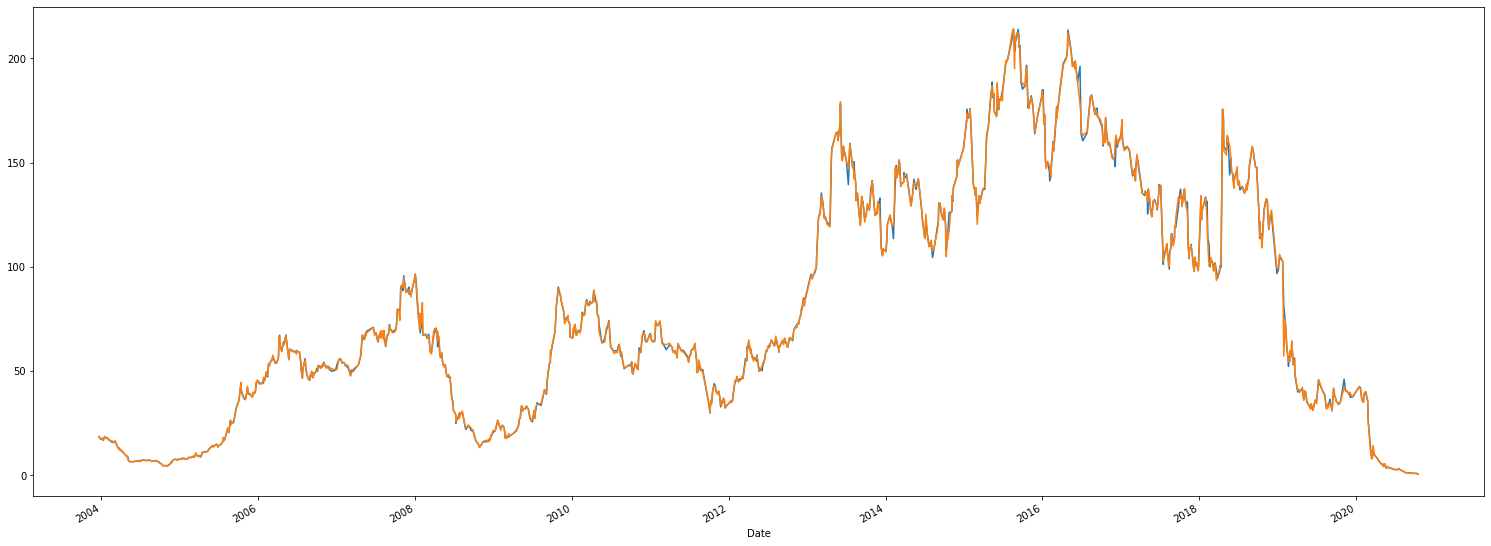

In [55]:
df2['Actual'].plot(figsize=(26,10))
df2['Predicted'].plot(figsize=(26,10))

In [56]:
#df2.isnull().sum()/len(df)*100  #Checking % of data that's 0
df2.dropna(inplace=True)

In [57]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df2['Actual'], df2['Predicted']))
print('Mean Squared Error:', metrics.mean_squared_error(df2['Actual'], df2['Predicted']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df2['Actual'], df2['Predicted'])))
print("Score:", regressor.score(X_test, y_test))

Mean Absolute Error: 0.7402256959871126
Mean Squared Error: 2.687411280876574
Root Mean Squared Error: 1.6393325717732121
Score: 0.9990897433579428


In [58]:
r=(df2['Actual']/df2['Predicted'])



<AxesSubplot:xlabel='Date'>

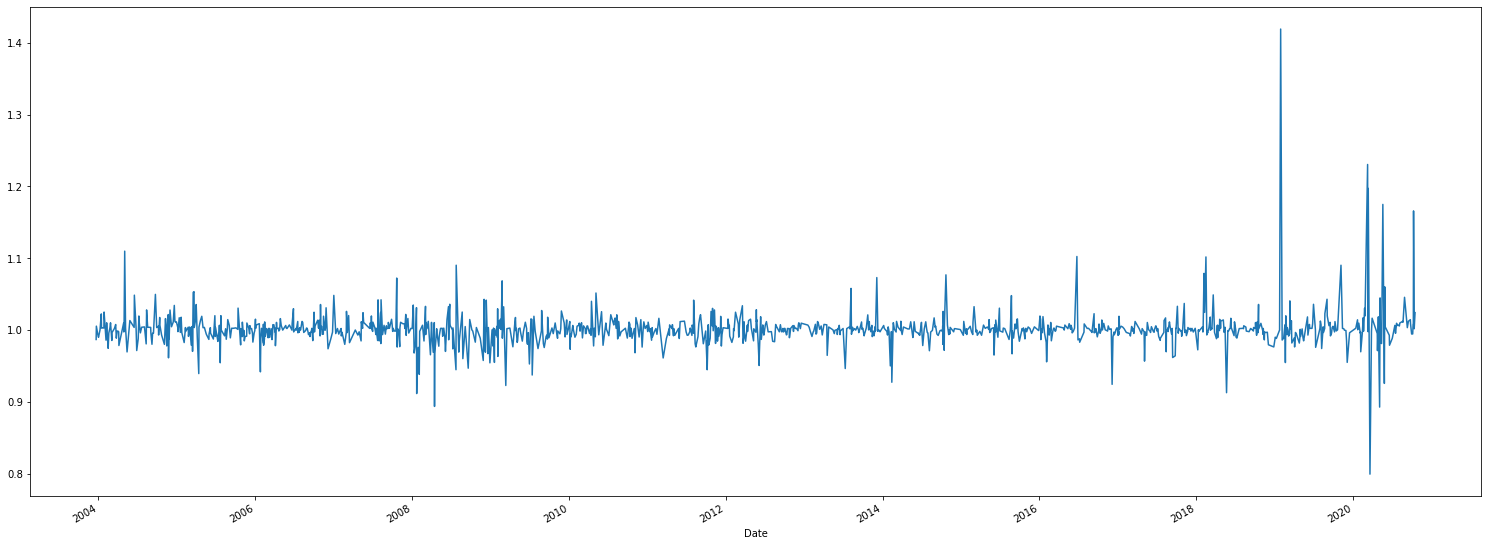

In [59]:
r.plot(figsize=(26,10))

## SGDRegressor

In [60]:
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

In [61]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

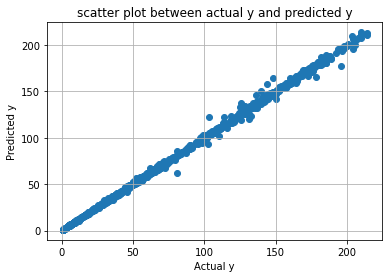

Mean Squared Error : 3.6460660733930896
Mean Absolute Error : 0.9718197444694393
Score: 0.9987650361207076


In [62]:
# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(X_train, y_train)
plt.scatter(y_test,clf_.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',metrics.mean_squared_error(y_test, clf_.predict(X_test)))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, clf_.predict(X_test)))
print("Score:", clf_.score(X_test, y_test))

In [63]:
y_pred = clf_.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.sort_values(by='Date',inplace=True) 
df3

,Actual,Predicted
Date,,
2003-12-22,18.454201,18.476361
2003-12-23,18.054300,17.779088
2003-12-30,17.254400,17.540535
2004-01-02,17.711500,17.876897
2004-01-09,16.740200,17.045823
...,...,...
2020-10-07,0.990000,0.999898
2020-10-08,0.922600,0.957215
2020-10-09,0.917800,0.792667


<AxesSubplot:xlabel='Date'>

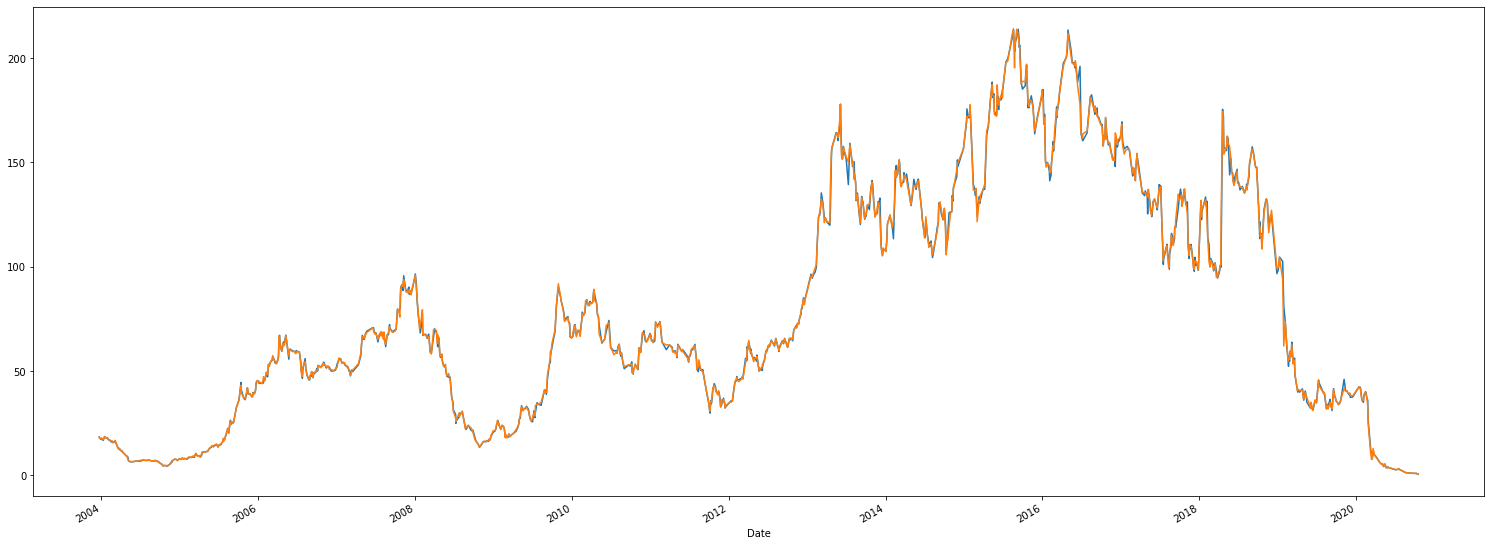

In [64]:
df3['Actual'].plot(figsize=(26,10))
df3['Predicted'].plot(figsize=(26,10))

In [65]:
a=[0.6844, 0.6294]   #a = Close, Open
test=pd.DataFrame([a])

In [66]:
print("Linar regression: " + str(regressor.predict(test)))
stest=scaler.transform(test)
print("SGD Regressor:    " +str(clf_.predict(stest)))

Linar regression: [0.61414605]
SGD Regressor:    [0.68375828]


## Random forest
- Some issues, need fixing

In [67]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [68]:
X = df[['Close']]
y= (df['Close'].shift(-1))
y.dropna(inplace=True)
#X.dropna(inplace=True)
X.drop(X.tail(1).index,inplace=True) # drop last n rows

D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
def rfr_model(X, y):# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,20),
            'n_estimators': (10, 50, 100, 1000, 2000, 4000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
    predictions = cross_val_predict(rfr, X, y, cv=10)
  
    return predictions

In [70]:
output = (rfr_model(X,y))

In [71]:
scores

NameError: name 'scores' is not defined

In [ ]:
for val in output:
    print(val, end=" ")

In [ ]:
df3=X

In [69]:
df3["Pred"]=output

<ipython-input-69-2c7a57dfa087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Pred"]=output


In [70]:
df3.tail(200)

,Close,Pred
Date,,
2019-12-27,37.820000,38.122379
2019-12-30,37.750000,38.122379
2020-01-02,40.939999,39.450599
2020-01-03,39.860001,39.230525
2020-01-06,38.570000,38.328470
...,...,...
2020-10-09,0.696400,4.569138
2020-10-12,0.676800,4.569138
2020-10-13,0.600600,4.569138


In [71]:
print(output)

[19.22849684 19.29095424 18.22572263 ...  4.56913758  4.56913758
  4.56913758]


<AxesSubplot:xlabel='Date'>

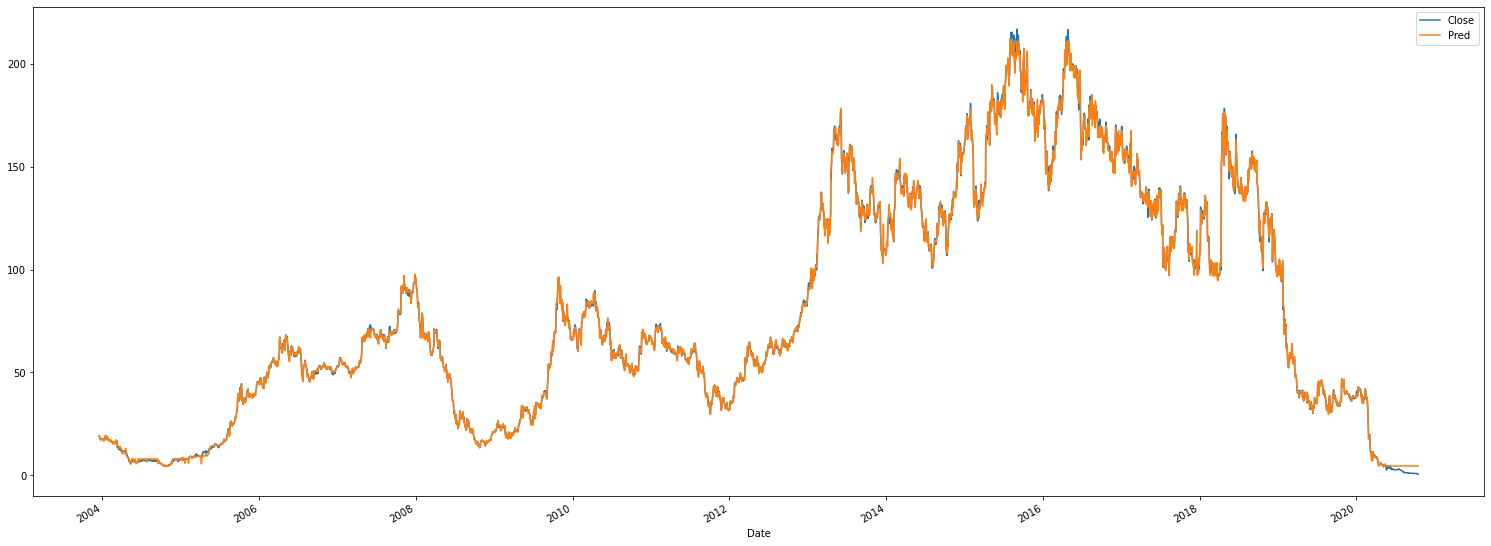

In [72]:
df3.plot(figsize=(26,10))

<AxesSubplot:xlabel='Date'>

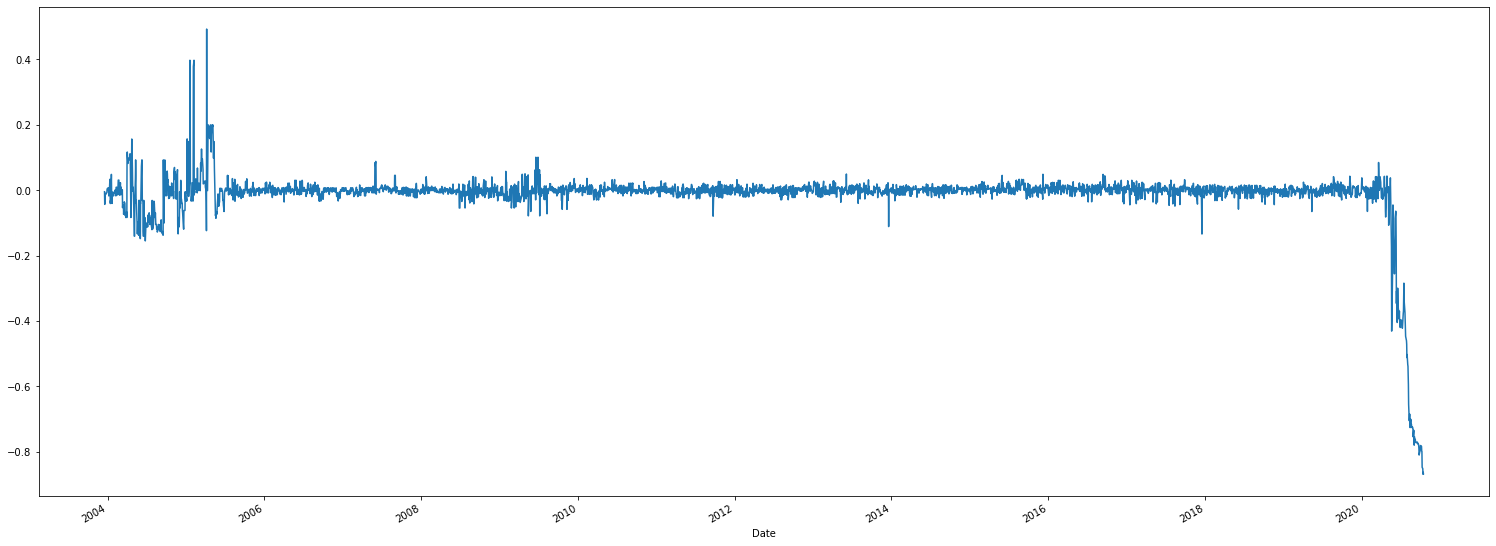

In [73]:
r=(df3['Close']/df3['Pred'])-1

r.plot(figsize=(26,10))

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df2['Actual'], df2['Predicted']))
print('Mean Squared Error:', metrics.mean_squared_error(df2['Actual'], df2['Predicted']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df2['Actual'], df2['Predicted'])))
print("Score:", rfr.score(X_test, y_test))

Mean Absolute Error: 0.7085179253656939
Mean Squared Error: 1.8251396467052063
Root Mean Squared Error: 1.350977293186383


NameError: name 'rfr' is not defined

## Testing the tutorial from 
https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5


## Didn't work as expected, poor preformance, (like stockprice = -50nok in 2021), and a very simple alg!

In [14]:
data = pd.read_csv("NAS.csv")     

In [16]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2003-12-18,19.139799
1,2003-12-19,18.454201
2,2003-12-22,18.054300
3,2003-12-23,17.425800
4,2003-12-24,NaN


In [17]:
#!pip install fbprophet
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

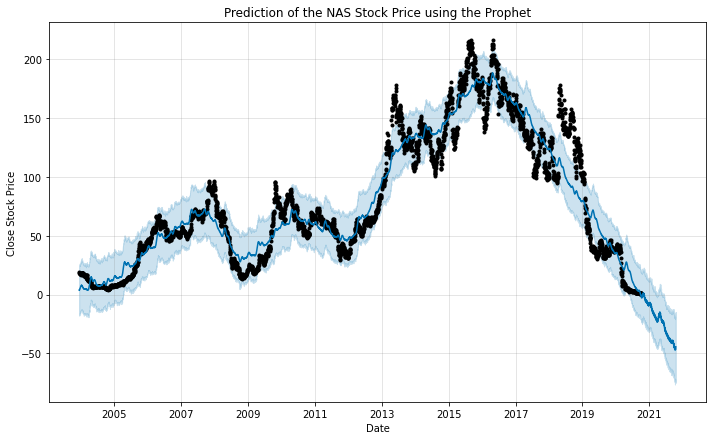

In [18]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)

plt.title("Prediction of the NAS Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()


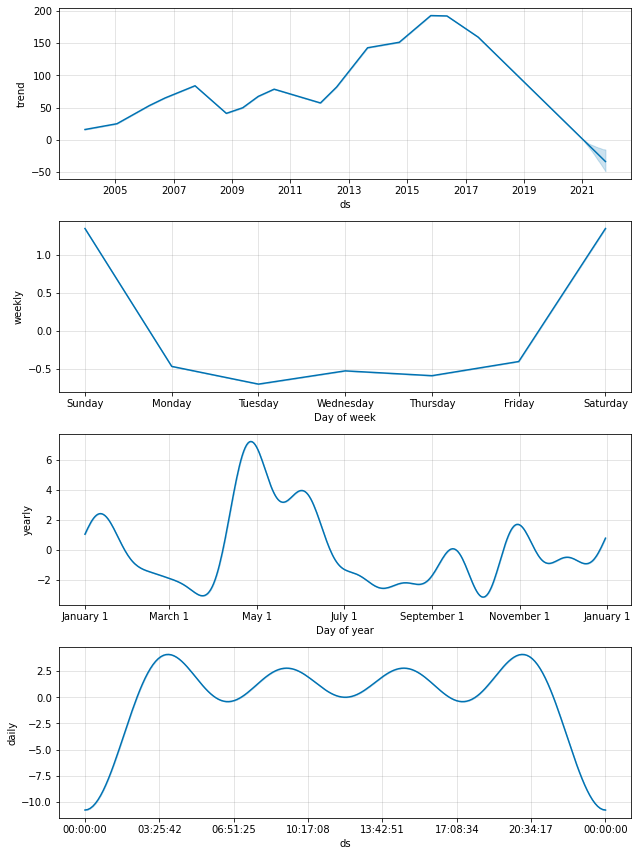

In [19]:
m.plot_components(prediction)
plt.show()